# Modelo Epidemiológico SEIR

##  Introducción

## Modelo

Las ecuaciones del Modelo SEIR son (tomadas de [Wiki](https://es.wikipedia.org/wiki/Modelaje_matem%C3%A1tico_de_epidemias#Modelo_SEIR)):

![E1](https://wikimedia.org/api/rest_v1/media/math/render/svg/dd03d664597e441e2d536e2dc095619f63814101)

![E2](https://wikimedia.org/api/rest_v1/media/math/render/svg/740543477710a4695a1e716ebd34286b8388ecc1)

![E3](https://wikimedia.org/api/rest_v1/media/math/render/svg/aa6ae906d59599d1709d426b44e2b7d4d78ff681)

![E4](https://wikimedia.org/api/rest_v1/media/math/render/svg/6bcd3e4a70ae98afdf69a11c16e241ad7106c7f0)

## Implementación 

In [74]:
from Solver_EDOS import DP,np
import matplotlib.pyplot as plt

#-----------------HP-----------------------------

# Par. Exp.

B=0.1 # tasa promedio de Nacimientos
β=1/10**5 # Tasa de Transmision
μ=0.001 # Tasa de Mortalidad
ϵ=0.01 # Tasa de Incubación
γ=0.001 # Tasa de Recuperación


# Modelo

#S=P[0]
#E=P[1]
#I=P[2]
#R=P[3]

F=lambda t,P: np.array([B-β*P[0]*P[2]-μ*P[0],
                        β*P[0]*P[2]-(ϵ+μ)*P[1],
                        ϵ*P[1]-(γ+μ)*P[2],
                        γ*P[2]-μ*P[3]])

# Intervalo de Tiempo

T=[0,2500]

# Población inicial
#N=1000

P0=[500,100,300,100]
print('Población nicial:')
# Par. Numérico

n=1000
#--------------------Solución Numérica------------
t,P=DP(F,P0,T,n)

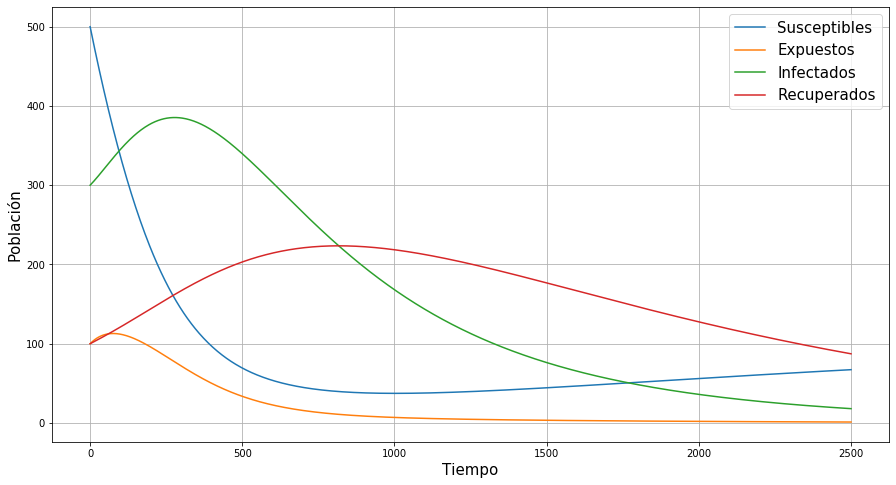

In [75]:
#--------------------Dibujitos-------------------
plt.figure(figsize=(15,8))
plt.plot(t,P[:,0])
plt.plot(t,P[:,1])
plt.plot(t,P[:,2])
plt.plot(t,P[:,3])
plt.legend(['Susceptibles','Expuestos','Infectados','Recuperados'],fontsize=15)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Población',fontsize=15)
plt.grid()
plt.show()

## Estimación de Parámetros